<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/drafts/MNE_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Imports & Set-Up

In [6]:
!pip install mne

In [7]:
import os
import numpy as np
import mne
from mne.preprocessing import compute_proj_ecg
import matplotlib as plt
import pylab as pl

In [8]:
# mount drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [9]:
%cd /content/gdrive/MyDrive/ColabNotebooks

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-8c4101487ac9>", line 1, in <module>
    get_ipython().magic('cd /content/gdrive/MyDrive/ColabNotebooks')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling 

OSError: ignored

# 2. Load Data

In [49]:
!wget --user "nedc" --password "nedc_resources" "https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/train/*.edf" 

--2022-05-05 15:11:15--  https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/train/*.edf
Resolving isip.piconepress.com (isip.piconepress.com)... 129.32.84.206
Connecting to isip.piconepress.com (isip.piconepress.com)|129.32.84.206|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="restricted stuff"
Reusing existing connection to isip.piconepress.com:443.
HTTP request sent, awaiting response... 404 Not Found
2022-05-05 15:11:15 ERROR 404: Not Found.



In [279]:
!wget --user "nedc" --password "nedc_resources" "https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf"

--2022-05-05 18:20:47--  https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.4.0/edf/dev_test/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf
Resolving isip.piconepress.com (isip.piconepress.com)... 129.32.84.206
Connecting to isip.piconepress.com (isip.piconepress.com)|129.32.84.206|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="restricted stuff"
Reusing existing connection to isip.piconepress.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 6971648 (6.6M)
Saving to: ‘00000258_s002_t002.edf.13’

00000258_s002_t002. 100%[===================>]   6.65M  8.58MB/s    in 0.8s    

2022-05-05 18:20:48 (8.58 MB/s) - ‘00000258_s002_t002.edf.13’ saved [6971648/6971648]



In [280]:
# Import single datafile from google drive
file = "00000258_s002_t002.edf" #"00000077_s003_t000.edf" # "00001819_s002_t000.edf"
data = mne.io.read_raw_edf(file)
raw = data.get_data()

Extracting EDF parameters from /content/gdrive/MyDrive/ColabNotebooks/00000258_s002_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [58]:
data.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 200.0 Hz
 meas_date: 2003-07-21 17:13:15 UTC
 nchan: 32
 projs: []
 sfreq: 400.0 Hz
>

In [10]:
raw

array([[-6.86294971e-06, -5.48965976e-06, -1.11354073e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [-2.15113757e-05, -2.39527801e-05, -2.07484369e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [ 2.53330700e-05,  2.10606124e-05,  2.15183757e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Drop Channels

In [281]:
data.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG EKG-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'EEG 32-REF']

In [282]:
channels = ['EEG FP1-REF', 
              'EEG FP2-REF',
              'EEG F3-REF',
              'EEG F4-REF',
              'EEG C3-REF',
              'EEG C4-REF',
              'EEG P3-REF',
              'EEG P4-REF',
              'EEG O1-REF',
              'EEG O2-REF',
              'EEG F7-REF',
              'EEG F8-REF',
              'EEG T3-REF',
              'EEG T4-REF',
              'EEG T5-REF',
              'EEG T6-REF',
              'EEG FZ-REF',
              'EEG CZ-REF',
              'EEG PZ-REF',
              'EEG A1-REF',
              'EEG A2-REF']

In [283]:
# kick out data.ch_names that don't have a match in channels using data.drop_channel
# take item from long list data.ch_names[0] and iterate over all items in channels channels[:]
# if no match, drop data.ch_names[0] from data.ch_names
kick_out = "yes"
channels2drop = []

for j in range(0,len(data.ch_names)):
  for i in range(0,len(channels)):
    if data.ch_names[j] == channels[i]:
      kick_out = "no"
      break
    else:
      kick_out = "yes"
  if kick_out == "yes":
    print(f"kick out {j}")
    channels2drop.append(j)
  else:
    print(f"keep {j}")

keep 0
keep 1
keep 2
keep 3
keep 4
keep 5
keep 6
keep 7
keep 8
keep 9
keep 10
keep 11
keep 12
keep 13
keep 14
keep 15
keep 16
keep 17
keep 18
kick out 19
keep 20
keep 21
kick out 22
kick out 23
kick out 24
kick out 25
kick out 26
kick out 27
kick out 28
kick out 29
kick out 30
kick out 31


In [284]:
names2drop = []
for i in range(0,len(channels2drop)):
  names2drop.append(data.ch_names[channels2drop[i]])

In [285]:
names2drop

['EEG EKG-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'EEG 32-REF']

In [286]:
for drop in names2drop:
  data.drop_channels(data.ch_names[data.ch_names.index(drop)])

In [287]:
data.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG A1-REF',
 'EEG A2-REF']

# Plot Raw Time Series for Each Electrode

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


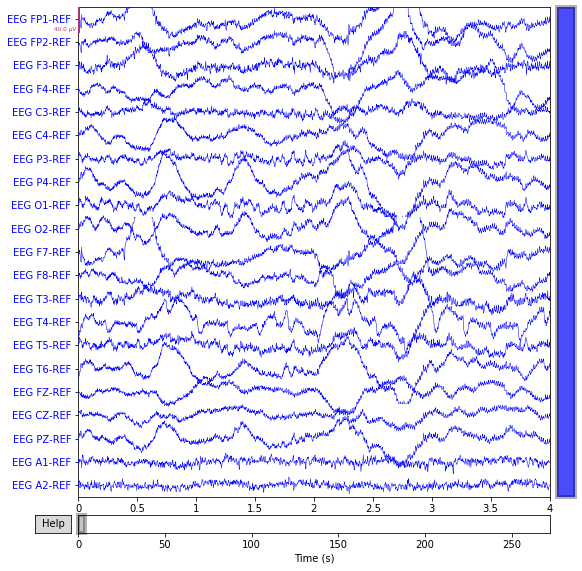

In [288]:
# plot raw data
data.plot(duration=4, n_channels=21, color = 'b');

# 3. Electrode Montage (10-20)

In [290]:
elecMont = mne.channels.make_standard_montage("standard_1020")

In [297]:
electrodes = ['FP1', 
              'FP2',
              'F3',
              'F4',
              'C3',
              'C4',
              'P3',
              'P4',
              'O1',
              'O2',
              'F7',
              'F8',
              'T3',
              'T4',
              'T5',
              'T6',
              'FZ',
              'CZ',
              'PZ',
              'A1',
              'A2']

In [298]:
kick_out = "yes"
elec2drop = []

for j in range(0,len(elecMont.ch_names)):
  for i in range(0,len(electrodes)):
    if elecMont.ch_names[j] == electrodes[i]:
      kick_out = "no"
      break
    else:
      kick_out = "yes"
  if kick_out == "yes":
    print(f"kick out {j}")
    elec2drop.append(j)
  else:
    print(f"keep {j}")

kick out 0
kick out 1
kick out 2
kick out 3
kick out 4
kick out 5
kick out 6
kick out 7
kick out 8
kick out 9
kick out 10
kick out 11
kick out 12
kick out 13
kick out 14
keep 15
kick out 16
keep 17
kick out 18
kick out 19
kick out 20
keep 21
kick out 22
keep 23
kick out 24
kick out 25
kick out 26
kick out 27
kick out 28
kick out 29
kick out 30
kick out 31
kick out 32
kick out 33
kick out 34
kick out 35
kick out 36
kick out 37
kick out 38
keep 39
kick out 40
kick out 41
kick out 42
keep 43
kick out 44
kick out 45
kick out 46
kick out 47
kick out 48
kick out 49
kick out 50
kick out 51
kick out 52
kick out 53
kick out 54
kick out 55
kick out 56
kick out 57
kick out 58
kick out 59
kick out 60
keep 61
kick out 62
kick out 63
kick out 64
keep 65
kick out 66
kick out 67
kick out 68
kick out 69
kick out 70
kick out 71
kick out 72
kick out 73
kick out 74
kick out 75
kick out 76
kick out 77
kick out 78
kick out 79
keep 80
kick out 81
keep 82
kick out 83
kick out 84
kick out 85
keep 86
keep 87
ke

In [303]:
nameselec2drop = []
for i in range(0,len(elec2drop)):
  nameselec2drop.append(elecMont.ch_names[elec2drop[i]])

In [315]:
from mne.viz.utils import plot_sensors
?plot_sensors()

In [330]:
plot_sensors(data.info, kind = "topomap", ch_type = "eeg")

RuntimeError: ignored

In [309]:
elecMont.plot_sensors(elecMont)

AttributeError: ignored

In [302]:
for drop in nameselec2drop:
  elecMont.plot(kind='topomap', show_names=True, elecMont.ch_names[elecMont.ch_names.index(drop)])

SyntaxError: ignored

In [291]:
elecMont.get_positions()["ch_pos"]["Fp1"]

array([-0.0294367,  0.0839171, -0.00699  ])

In [ ]:
elecMont.plot(kind='topomap', show_names=True);

In [ ]:
fig = elecMont.plot(kind='3d');
fig.gca().view_init(azim=70, elev=15);

# 4. Plot Raw Data and Frequency Spectrum

In [ ]:
# assign channel locations
#montage = data.get_montage()

In [289]:
# get chanlocs
Fp1 = elecMont.get_positions()["ch_pos"]["Fp1"]
Fp2 = elecMont.get_positions()["ch_pos"]["Fp2"]
F3 = elecMont.get_positions()["ch_pos"]["F3"]
F4 = elecMont.get_positions()["ch_pos"]["F4"]
C3 = elecMont.get_positions()["ch_pos"]["C3"]
C4 = elecMont.get_positions()["ch_pos"]["C4"]
P3 = elecMont.get_positions()["ch_pos"]["P3"]
P4 = elecMont.get_positions()["ch_pos"]["P4"]
O1 = elecMont.get_positions()["ch_pos"]["O1"]
O2 = elecMont.get_positions()["ch_pos"]["O2"]
F7 = elecMont.get_positions()["ch_pos"]["F7"]
F8 = elecMont.get_positions()["ch_pos"]["F8"]
T3 = elecMont.get_positions()["ch_pos"]["T3"]
T4 = elecMont.get_positions()["ch_pos"]["T4"]
T5 = elecMont.get_positions()["ch_pos"]["T5"]
T6 = elecMont.get_positions()["ch_pos"]["T6"]
A1 = elecMont.get_positions()["ch_pos"]["A1"]
A2 = elecMont.get_positions()["ch_pos"]["A2"]
Fz = elecMont.get_positions()["ch_pos"]["Fz"]
Cz = elecMont.get_positions()["ch_pos"]["Cz"]
Pz = elecMont.get_positions()["ch_pos"]["Pz"]


NameError: ignored

In [ ]:
# now how do I add these locations to the data so i will be plotted???
#digitized points in info structure??

Effective window size : 8.192 (s)


<ipython-input-23-e04da774a2f2>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data_fp.plot_psd(fmax=data.info['sfreq']/2);


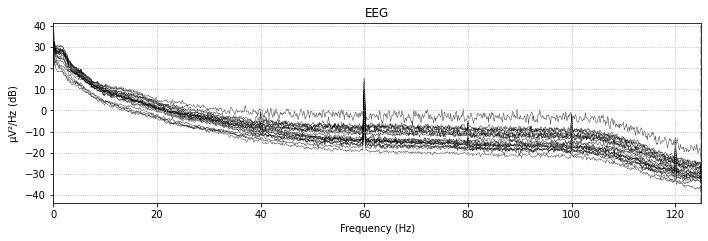

In [23]:
# plot frequency 
data_fp.plot_psd(fmax=data.info['sfreq']/2);

In [24]:
data_fp.get_data()[0].shape

(301250,)

# 5. Preprocessing
Run ICA to clean up the data

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(data)
ica.exclude = [1, 2]  
#ica.plot_properties(data, picks=ica.exclude) # need electrode locations

In [ ]:
orig_data = data.copy()
data.load_data()
ica.apply(data);

In [ ]:
#plot
chan_idxs = [data.ch_names.index(ch) for ch in data.ch_names]
orig_data.plot(order=chan_idxs, start=12, duration=4, color = "b")
data.plot(order=chan_idxs, start=12, duration=4, color = "purple");

# Filter

In [25]:
filter_params = mne.filter.create_filter(data.get_data(), data.info['sfreq'],
                                         l_freq=0.2, h_freq=10)

Setting up band-pass filter from 0.2 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 4125 samples (16.500 sec)



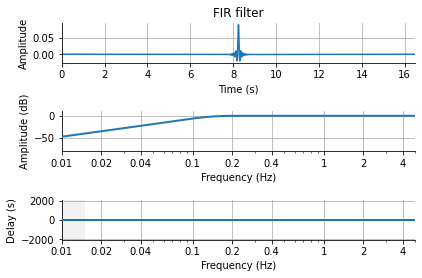

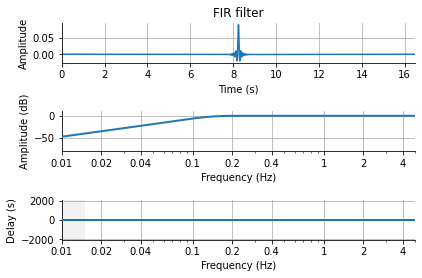

In [26]:
mne.viz.plot_filter(filter_params, data.info['sfreq'], flim=(0.01, 5))

Effective window size : 8.192 (s)


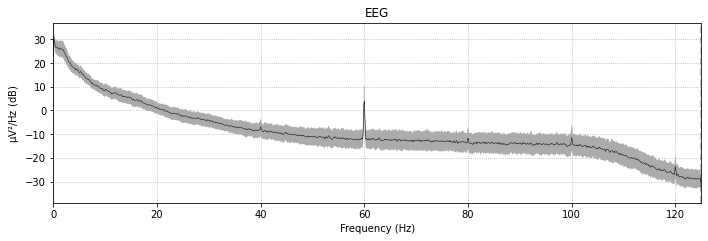

In [27]:
fig = data.plot_psd(fmax=data.info['sfreq']/2, average=True) #power outlet at 60 Hz

Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


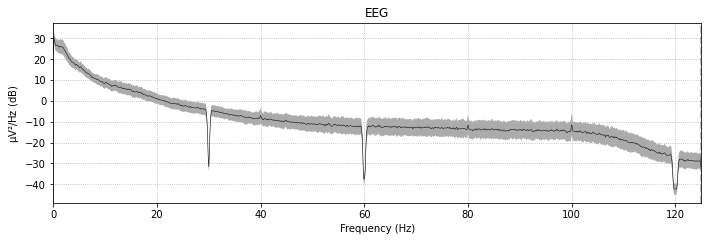

In [28]:
eeg_picks = mne.pick_types(data.info, eeg=True)
freqs = (30, 60, 120)
raw_notch = data.copy().load_data()
raw_notch = raw_notch.notch_filter(freqs=freqs, picks=eeg_picks)
fig = raw_notch.plot_psd(fmax=data.info['sfreq']/2, average=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 4125 samples (16.500 sec)

Effective window size : 8.192 (s)


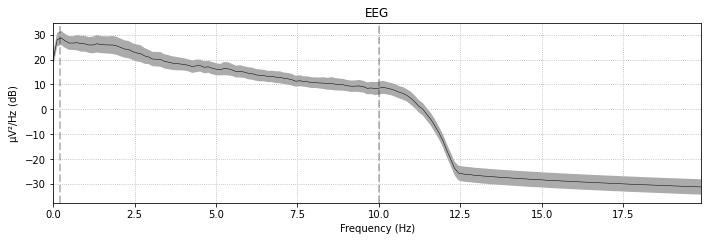

In [29]:
#high-pass filter
raw_notch = raw_notch.filter(l_freq=0.2, h_freq=10)
fig = raw_notch.plot_psd(fmax=20, average=True)

Effective window size : 10.240 (s)


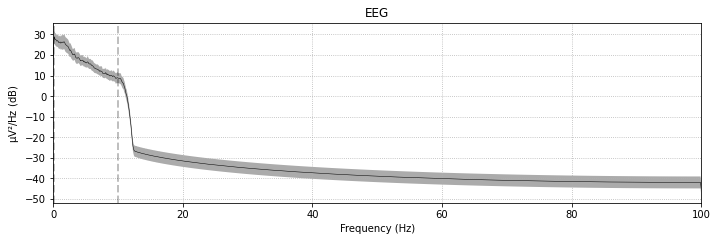

In [30]:
#downsampling
raw_downsampled = raw_notch.resample(sfreq=200)
fig = raw_downsampled.plot_psd(average=True)

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


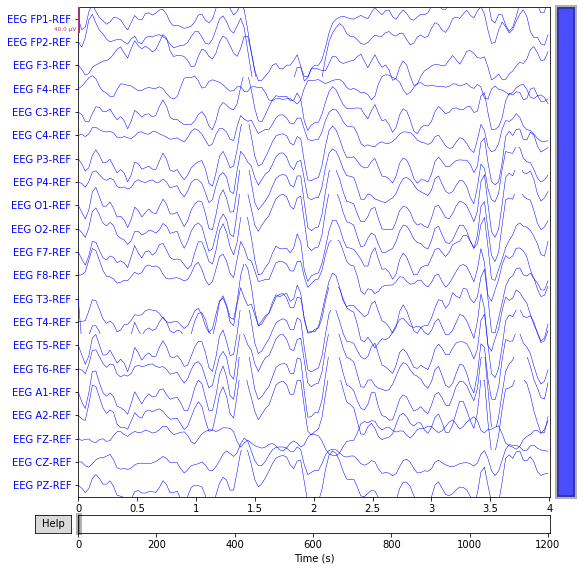

In [31]:
raw_downsampled.plot(duration=4, proj=False, n_channels=21,
         remove_dc=False, color = "b");

# 6. Epoch Continuous Data into Even Epochs (no events)

In [32]:
epochs = mne.make_fixed_length_epochs(raw_downsampled, duration=4, preload=False)

Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated


Using data from preloaded Raw for 301 events and 800 original time points ...
0 bad epochs dropped
Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-33-2f874cee4801>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  plot = epochs.plot_image(picks=["EEG FP1-REF"]);


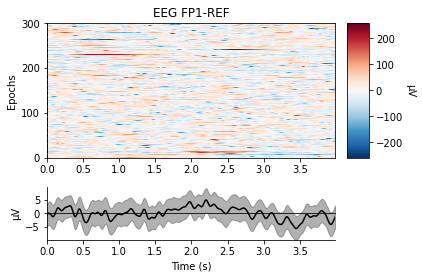

In [33]:
plot = epochs.plot_image(picks=["EEG FP1-REF"]);

#7. Time-Frequency Analysis

Using data from preloaded Raw for 301 events and 800 original time points ...
No baseline correction applied


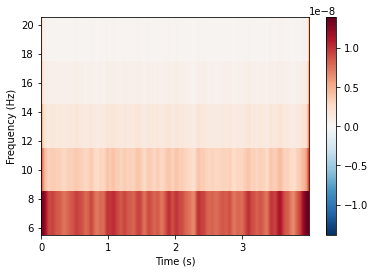

[<Figure size 432x288 with 2 Axes>]

In [34]:
frequencies = np.arange(7, 20, 3)
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False,   # needs epochs, but epochs need events
                                      freqs=frequencies, decim=3)
power.plot(["EEG O2-REF"])